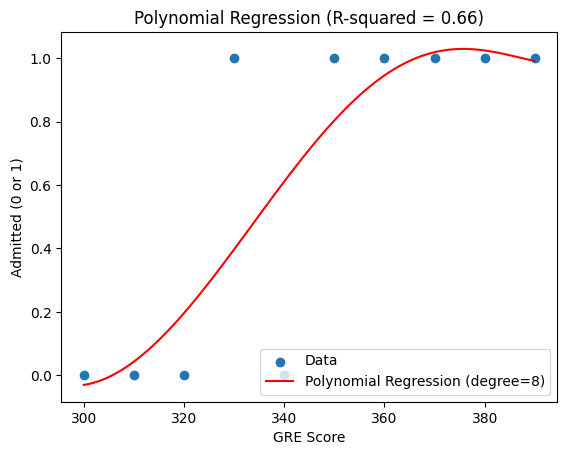

In [ ]:
# prompt: I have data of GRE score and admitted or not. fit me a polynomial regression. Assume around 10 GRE scores and status. plot the graph. compute r2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Sample data (replace with your actual data)
gre_scores = np.array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390]).reshape(-1, 1)
admitted = np.array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1])  # 0: not admitted, 1: admitted

# Create polynomial features
poly_features = PolynomialFeatures(degree=8)
gre_poly = poly_features.fit_transform(gre_scores)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(gre_poly, admitted)

# Make predictions
gre_pred = np.linspace(min(gre_scores), max(gre_scores), 100).reshape(-1, 1)
gre_pred_poly = poly_features.fit_transform(gre_pred)
admitted_pred = model.predict(gre_pred_poly)

# Calculate R-squared
r2 = r2_score(admitted, model.predict(gre_poly))

# Plot the results
plt.scatter(gre_scores, admitted, label='Data')
plt.plot(gre_pred, admitted_pred, color='red', label=f'Polynomial Regression (degree={8})')
plt.xlabel('GRE Score')
plt.ylabel('Admitted (0 or 1)')
plt.title(f'Polynomial Regression (R-squared = {r2:.2f})')
plt.legend()
plt.show()


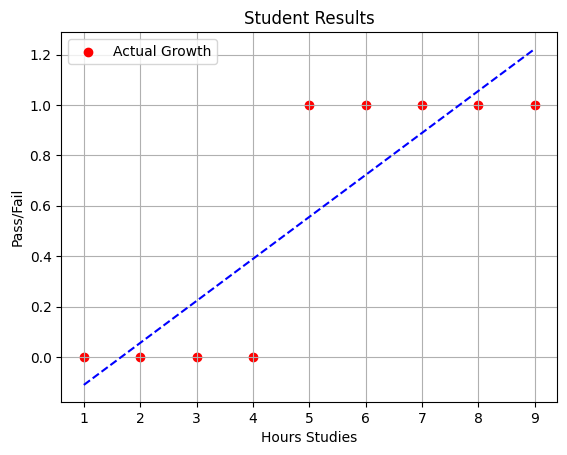

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#  Create a simple dataset (Hours Studied vs Pass/Fail)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])  # Hours studied
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass

# Train a Logistic Regression model
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='red', label='Actual Growth')
plt.plot(X, y_pred, color='blue', linestyle='--')
plt.xlabel('Hours Studies')
plt.ylabel('Pass/Fail')
plt.title('Student Results')
plt.legend()
plt.grid(True)
plt.show()

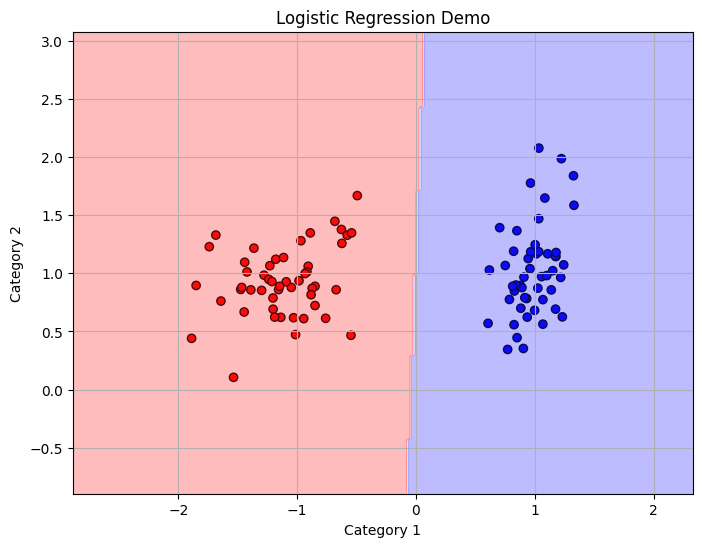

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Step 1: Create a simple dataset (2 features, 2 classes)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=1)

# Step 2: Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 3: Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Logistic Regression Demo")
plt.xlabel("Category 1")
plt.ylabel("Category 2")

# Step 4: Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.grid(True)
plt.show()


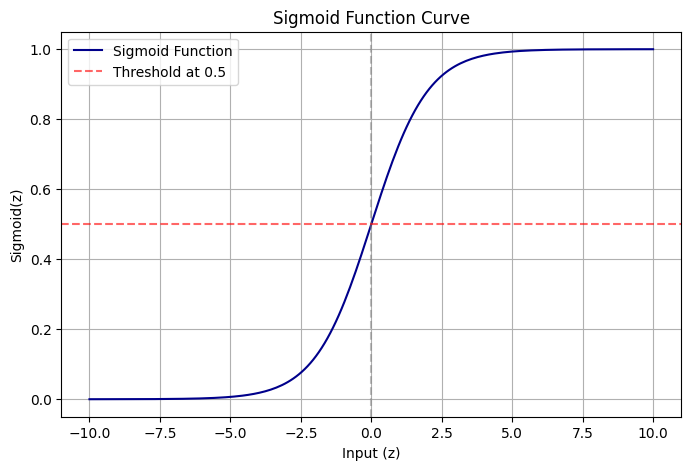

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

# Step 2: Generate input values from -10 to 10
z_values = np.linspace(-10, 10, 200)
sigmoid_values = sigmoid(z_values)

# Step 3: Plot the sigmoid function
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values, label="Sigmoid Function", color="darkblue")
plt.title("Sigmoid Function Curve")
plt.xlabel("Input (z)")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='red', linestyle='--', alpha=0.6, label='Threshold at 0.5')
plt.legend()
plt.show()


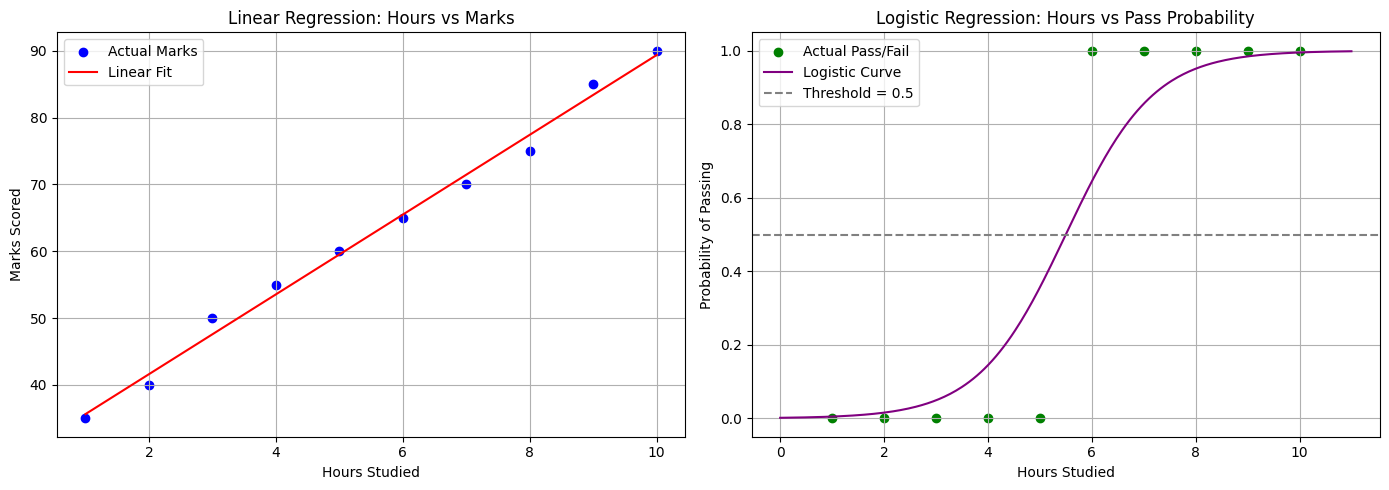

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Sample data: Hours studied vs marks (for linear) and pass/fail (for logistic)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y_regression = np.array([35, 40, 50, 55, 60, 65, 70, 75, 85, 90])  # marks
y_classification = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])        # pass/fail

# Train the model
linear_model = LinearRegression()
linear_model.fit(X, y_regression)
y_linear_pred = linear_model.predict(X)

# Train the model
logistic_model = LogisticRegression()
logistic_model.fit(X, y_classification)
x_range = np.linspace(0, 11, 300).reshape(-1, 1)
y_logistic_prob = logistic_model.predict_proba(x_range)[:, 1]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression Plot
ax1.scatter(X, y_regression, color='blue', label='Actual Marks')
ax1.plot(X, y_linear_pred, color='red', label='Linear Fit')
ax1.set_title('Linear Regression: Hours vs Marks')
ax1.set_xlabel('Hours Studied')
ax1.set_ylabel('Marks Scored')
ax1.legend()
ax1.grid(True)

# Logistic Regression Plot
ax2.scatter(X, y_classification, color='green', label='Actual Pass/Fail')
ax2.plot(x_range, y_logistic_prob, color='purple', label='Logistic Curve')
ax2.axhline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
ax2.set_title('Logistic Regression: Hours vs Pass Probability')
ax2.set_xlabel('Hours Studied')
ax2.set_ylabel('Probability of Passing')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets
from IPython.display import display

# Data
gre_scores = np.array([290, 300, 310, 320, 330, 340, 295, 305, 315, 325])
admissions = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

X = gre_scores.reshape(-1, 1)
y = admissions

# Model
model = LogisticRegression()
model.fit(X, y)

# Widget
gre_input = widgets.IntSlider(
    value=310,
    min=280,
    max=350,
    step=1,
    description='GRE Score:',
    continuous_update=False
)

# Function to update plot and prediction
def update_plot(gre_val):
    prediction = model.predict([[gre_val]])[0]
    prob = model.predict_proba([[gre_val]])[0][1]

    print(f"\nGRE Score: {gre_val}")
    print(f"Prediction: {'Admitted' if prediction else 'Not Admitted'}")
    print(f"Probability of Admission: {prob:.2f}")

    # Plot sigmoid
    gre_range = np.linspace(280, 350, 300).reshape(-1, 1)
    predicted_probs = model.predict_proba(gre_range)[:, 1]

    plt.figure(figsize=(8, 5))
    plt.scatter(gre_scores, admissions, color='red', edgecolors='k', label='Training Data')
    plt.plot(gre_range, predicted_probs, color='blue', label='Sigmoid Curve')
    plt.axvline(gre_val, color='green', linestyle='--', label='Your GRE')
    plt.xlabel("GRE Score")
    plt.ylabel("Probability of Admission")
    plt.title("Logistic Regression Prediction")
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the widget
widgets.interact(update_plot, gre_val=gre_input)


interactive(children=(IntSlider(value=310, continuous_update=False, description='GRE Score:', max=350, min=280…

<function __main__.update_plot(gre_val)>

Enter your GRE score: 320
Enter your CGPA: 8.6

Prediction Result:
Admitted
Probability of Admission: 0.86


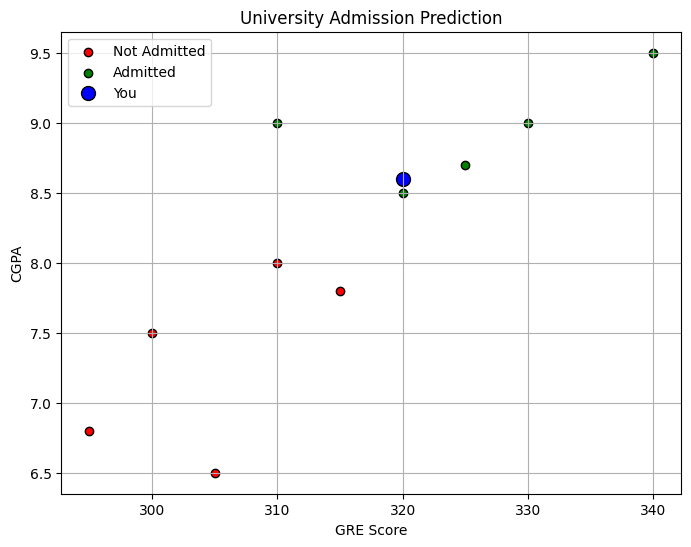

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data: GRE, CGPA, Admission (1 = Admitted, 0 = Not Admitted)
data = np.array([
    [310, 8.0, 0],
    [320, 8.5, 1],
    [330, 9.0, 1],
    [300, 7.5, 0],
    [340, 9.5, 1],
    [305, 6.5, 0],
    [315, 7.8, 0],
    [325, 8.7, 1],
    [310, 9.0, 1],
    [295, 6.8, 0]
])

# Split features and labels
X = data[:, :2]  # GRE and CGPA
y = data[:, 2]   # Admission

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Take user input
gre_input = float(input("Enter your GRE score: "))
cgpa_input = float(input("Enter your CGPA: "))
user_input = np.array([[gre_input, cgpa_input]])

# Predict admission
prediction = model.predict(user_input)
probability = model.predict_proba(user_input)[0][1]

# Output result
print("\nPrediction Result:")
print("Admitted" if prediction[0] == 1 else "Not Admitted ")
print(f"Probability of Admission: {probability:.2f}")

# Plotting
plt.figure(figsize=(8,6))
for admitted in [0, 1]:
    subset = X[y == admitted]
    label = 'Admitted' if admitted == 1 else 'Not Admitted'
    color = 'green' if admitted == 1 else 'red'
    plt.scatter(subset[:, 0], subset[:, 1], label=label, c=color, edgecolor='k')

# User point
plt.scatter(gre_input, cgpa_input, c='blue', s=100, edgecolors='k', label="You")

plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.title("University Admission Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data: GRE, CGPA, Admitted
data = [
    [310, 8.0, 1],
    [300, 7.5, 0],
    [320, 8.6, 1],
    [315, 8.2, 1],
    [299, 7.0, 0],
    [325, 9.0, 1],
    [280, 6.5, 0],
    [330, 9.1, 1],
    [340, 9.5, 1],
    [290, 7.2, 0],
]

df = pd.DataFrame(data, columns=["GRE", "CGPA", "Admitted"])

# Features and label
X = df[["GRE", "CGPA"]]
y = df["Admitted"]

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Extract weights
w1, w2 = model.coef_[0]
b = model.intercept_[0]

print(f"\nModel Weights:")
print(f"w1 (GRE): {w1:.4f}")
print(f"w2 (CGPA): {w2:.4f}")
print(f"Intercept (b): {b:.4f}")

# Take user input
gre_input = float(input("\nEnter GRE score: "))
cgpa_input = float(input("Enter CGPA: "))
user_input = pd.DataFrame({"GRE": [gre_input], "CGPA": [cgpa_input]})

# Prediction
probability = model.predict_proba(user_input)[0][1]
prediction = model.predict(user_input)[0]

print(f"\nPredicted probability of admission: {probability:.4f}")
print("Prediction:", "Admitted ✅" if prediction == 1 else "Not Admitted ❌")

# Plot decision boundary
gre_vals = np.linspace(280, 340, 100)
cgpa_vals = np.linspace(6.0, 10.0, 100)
GRE_grid, CGPA_grid = np.meshgrid(gre_vals, cgpa_vals)
grid_df = pd.DataFrame({
    "GRE": GRE_grid.ravel(),
    "CGPA": CGPA_grid.ravel()
})
Z = model.predict_proba(grid_df)[:, 1].reshape(GRE_grid.shape)

plt.contourf(GRE_grid, CGPA_grid, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["red", "green"])
plt.scatter(df["GRE"], df["CGPA"], c=df["Admitted"], cmap="bwr", edgecolors='k')
plt.scatter(gre_input, cgpa_input, color='gold', s=100, edgecolors='black', label="Your Input")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.title("Admission Prediction using Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()



Model Weights:
w1 (GRE): 0.6091
w2 (CGPA): 0.0394
Intercept (b): -186.2807

Enter GRE score: 280
Enter CGPA: 9.5

Predicted probability of admission: 0.0000
Prediction: Not Admitted ❌


In [ ]:
# REGULARIZATION
#===============

# The Obervations we made in the spreadsheet, how does it boil down in the code?
# How do we compute the lasso and ridge values using inbuilt libraries?

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# X has two features (like hours of study and sleep)
X = np.array([[1, 5], [2, 5], [3, 5], [4, 6]])
# y is the score
y = np.array([2, 4, 7, 8])

# Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

print("Linear Regression Coefficients:", lr.coef_)
print("Ridge Regression Coefficients :", ridge.coef_)
print("Lasso Regression Coefficients :", lasso.coef_)


Linear Regression Coefficients: [ 2.5        -1.33333333]
Ridge Regression Coefficients : [1.72727273 0.09090909]
Lasso Regression Coefficients : [1.3 0. ]


In [ ]:
# Working on our case study and finding R2 score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Input features: hours of study and sleep
X = np.array([[1, 5], [2, 5], [3, 5], [4, 6]])
y = np.array([2, 4, 7, 8])  # Target: score


# 1. Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X,y)
y_pred_linear = lr.predict(X)
print("Linear Regression R² Score:", r2_score(y, y_pred_linear))


# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)
y_pred_poly = poly_lr.predict(X_poly)
print("Polynomial Regression R² Score:", r2_score(y, y_pred_poly))

Linear Regression R² Score: 0.9926739926739927
Polynomial Regression R² Score: 1.0


In [ ]:
# Predicting from our case study

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Input features: hours of study and sleep
X = np.array([[1, 5], [2, 5], [3, 5], [4, 6]])
y = np.array([2, 4, 7, 8])  # Target: score

# 1. Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)
y_pred_linear = lr.predict(X)

print("Linear Regression Coefficients:", lr.coef_)
print("Linear Regression R² Score:", r2_score(y, y_pred_linear))

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)
y_pred_poly = poly_lr.predict(X_poly)

print("Polynomial Regression R² Score:", r2_score(y, y_pred_poly))

# 3. Predict on a new sample
new_sample = np.array([[5,6]])
new_sample_poly = poly.transform(new_sample)

print("Prediction on new sample:")
print("- Linear:", lr.predict(new_sample))
print("- Polynomial:", poly_lr.predict(new_sample_poly))


Linear Regression Coefficients: [ 2.5        -1.33333333]
Linear Regression R² Score: 0.9926739926739927
Polynomial Regression R² Score: 1.0
Prediction on new sample:
- Linear: [10.5]
- Polynomial: [13.09190715]


In [ ]:
# Working with all possilble cases
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Input features: hours of study and sleep
X = np.array([[1, 5], [2, 5], [3, 5], [4, 6]])
y = np.array([2, 4, 7, 8])  # Target: score

# 1. Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)
y_pred_linear = lr.predict(X)

# 2. Ridge Regression (linear features)
ridge_linear = Ridge(alpha=1.0)
ridge_linear.fit(X, y)
y_pred_ridge_linear = ridge_linear.predict(X)

# 3. Lasso Regression (linear features)
lasso_linear = Lasso(alpha=1.0)
lasso_linear.fit(X, y)
y_pred_lasso_linear = lasso_linear.predict(X)

print("=== Linear Features ===")
print("Linear Regression Coefficients:", lr.coef_)
print("Linear R² Score:", r2_score(y, y_pred_linear))
print("Ridge Coefficients:", ridge_linear.coef_)
print("Ridge R² Score:", r2_score(y, y_pred_ridge_linear))
print("Lasso Coefficients:", lasso_linear.coef_)
print("Lasso R² Score:", r2_score(y, y_pred_lasso_linear))

# 4. Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 4a. Linear Regression on Polynomial Features
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)
y_pred_poly = poly_lr.predict(X_poly)

# 4b. Ridge Regression on Polynomial Features
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_poly, y)
y_pred_ridge_poly = ridge_poly.predict(X_poly)

# 4c. Lasso Regression on Polynomial Features
lasso_poly = Lasso(alpha=1.0, max_iter=10000)
lasso_poly.fit(X_poly, y)
y_pred_lasso_poly = lasso_poly.predict(X_poly)

print("\n=== Polynomial Features ===")
print("Polynomial Regression Coefficients:", poly_lr.coef_)
print("Polynomial R² Score:", r2_score(y, y_pred_poly))
print("Ridge Coefficients:", ridge_poly.coef_)
print("Ridge R² Score:", r2_score(y, y_pred_ridge_poly))
print("Lasso Coefficients:", lasso_poly.coef_)
print("Lasso R² Score:", r2_score(y, y_pred_lasso_poly))

# 5. Prediction on new sample [5, 6]
new_sample = np.array([[5, 6]])
new_sample_poly = poly.transform(new_sample)

print("\n=== Prediction on [5, 6] ===")
print("Linear:", lr.predict(new_sample))
print("Linear Ridge:", ridge_linear.predict(new_sample))
print("Linear Lasso:", lasso_linear.predict(new_sample))
print("Polynomial:", poly_lr.predict(new_sample_poly))
print("Poly Ridge:", ridge_poly.predict(new_sample_poly))
print("Poly Lasso:", lasso_poly.predict(new_sample_poly))


=== Linear Features ===
Linear Regression Coefficients: [ 2.5        -1.33333333]
Linear R² Score: 0.9926739926739927
Ridge Coefficients: [1.72727273 0.09090909]
Ridge R² Score: 0.9396966669693942
Lasso Coefficients: [1.3 0. ]
Lasso R² Score: 0.8285714285714287

=== Polynomial Features ===
Polynomial Regression Coefficients: [ 1.05471187e-15  4.04642409e-02 -2.76035132e-02  5.00000000e-01
  9.19071518e-02 -3.03638645e-01]
Polynomial R² Score: 1.0
Ridge Coefficients: [ 0.          0.06623607 -0.02559712  0.30777234  0.22879189 -0.28156834]
Ridge R² Score: 0.9985756978740846
Lasso Coefficients: [ 0.          0.         -0.          0.          0.31824472 -0.02762826]
Lasso R² Score: 0.9123198090125915

=== Prediction on [5, 6] ===
Linear: [10.5]
Linear Ridge: [9.63636364]
Linear Lasso: [8.5]
Polynomial: [13.09190715]
Poly Ridge: [12.23453552]
Poly Lasso: [10.27310467]


In [ ]:
# What do we take away from this?
#---------------------------------

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample dataset (6 data points, 2 features)
X = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6]
])

# Output (some linear relation + noise)
y = np.array([3, 5, 7, 9, 11, 13])

# Model 1: Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
print("Linear Regression Coefficients:", lr.coef_)
print("MSE:", mean_squared_error(y, y_pred_lr))

# Model 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
print("\nRidge Coefficients:", ridge.coef_)
print("MSE (Ridge):", mean_squared_error(y, y_pred_ridge))

# Model 3: Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
print("\nLasso Coefficients:", lasso.coef_)
print("MSE (Lasso):", mean_squared_error(y, y_pred_lasso))


Linear Regression Coefficients: [1. 1.]
MSE: 1.314768175368353e-31

Ridge Coefficients: [0.97222222 0.97222222]
MSE (Ridge): 0.009002057613168685

Lasso Coefficients: [1.65714286 0.        ]
MSE (Lasso): 0.34285714285714275


Linear Regression Coefficients: [1. 1.] MSE: 1.314768175368353e-31
Ridge Regression Coefficients: [0.97222222 0.97222222] MSE: 0.009002057613168685
Lasso Regression Coefficients: [1.65714286 0.        ] MSE: 0.34285714285714275


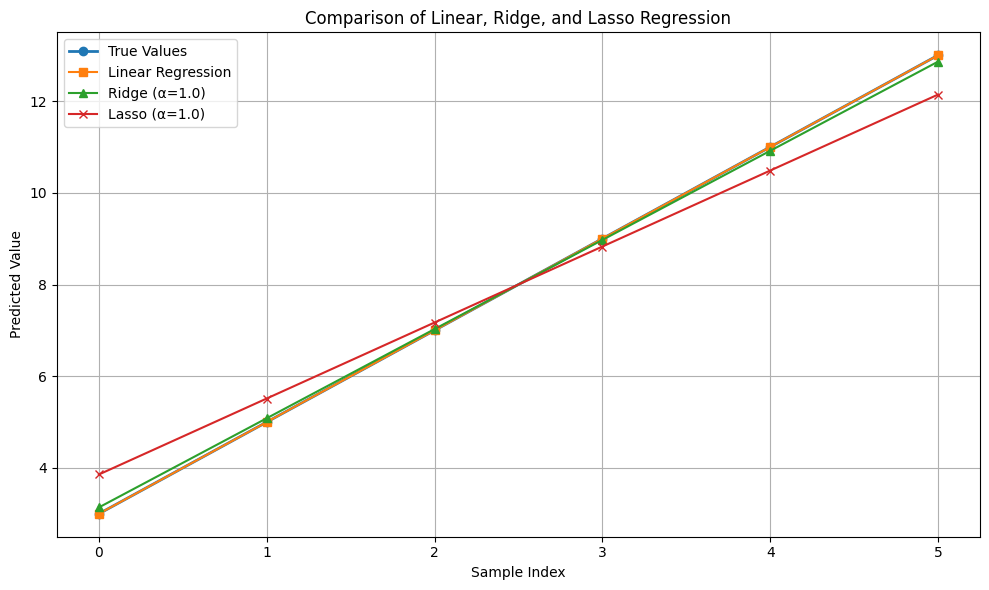

In [ ]:
# Visualization of given problem

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Sample dataset (6 points, 2 features)
X = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6]
])

# Target variable (roughly y = 1*x1 + 1*x2)
y = np.array([3, 5, 7, 9, 11, 13])

# Train all three models
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=1.0).fit(X, y)

# Predictions
y_pred_lr = lr.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)

# Print coefficients and errors
print("Linear Regression Coefficients:", lr.coef_, "MSE:", mean_squared_error(y, y_pred_lr))
print("Ridge Regression Coefficients:", ridge.coef_, "MSE:", mean_squared_error(y, y_pred_ridge))
print("Lasso Regression Coefficients:", lasso.coef_, "MSE:", mean_squared_error(y, y_pred_lasso))

# Plotting predictions
plt.figure(figsize=(10, 6))
plt.plot(y, label='True Values', marker='o', linewidth=2)
plt.plot(y_pred_lr, label='Linear Regression', marker='s')
plt.plot(y_pred_ridge, label='Ridge (α=1.0)', marker='^')
plt.plot(y_pred_lasso, label='Lasso (α=1.0)', marker='x')

plt.title("Comparison of Linear, Ridge, and Lasso Regression")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Lets add R2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset
X = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6]
])

y = np.array([3, 5, 7, 9, 11, 13])

# Fit models
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=1.0).fit(X, y)

# Predictions
y_pred_lr = lr.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)

# Print metrics
print("=== Linear Regression ===")
print("Coefficients:", lr.coef_)
print("MSE:", mean_squared_error(y, y_pred_lr))
print("R² Score:", r2_score(y, y_pred_lr))

print("\n=== Ridge Regression ===")
print("Coefficients:", ridge.coef_)
print("MSE:", mean_squared_error(y, y_pred_ridge))
print("R² Score:", r2_score(y, y_pred_ridge))

print("\n=== Lasso Regression ===")
print("Coefficients:", lasso.coef_)
print("MSE:", mean_squared_error(y, y_pred_lasso))
print("R² Score:", r2_score(y, y_pred_lasso))



=== Linear Regression ===
Coefficients: [1. 1.]
MSE: 1.314768175368353e-31
R² Score: 1.0

=== Ridge Regression ===
Coefficients: [0.97222222 0.97222222]
MSE: 0.009002057613168685
R² Score: 0.9992283950617284

=== Lasso Regression ===
Coefficients: [1.65714286 0.        ]
MSE: 0.34285714285714275
R² Score: 0.9706122448979592


=== Linear Regression ===
Coefficients: [1. 1.]
Intercept: 1.0000000000000009
MSE: 1.314768175368353e-31
R² Score: 1.0

=== Ridge Regression ===
Coefficients: [0.97222222 0.97222222]
Intercept: 1.1944444444444438
MSE: 0.009002057613168685
R² Score: 0.9992283950617284

=== Lasso Regression ===
Coefficients: [1.65714286 0.        ]
Intercept: 2.1999999999999993
MSE: 0.34285714285714275
R² Score: 0.9706122448979592


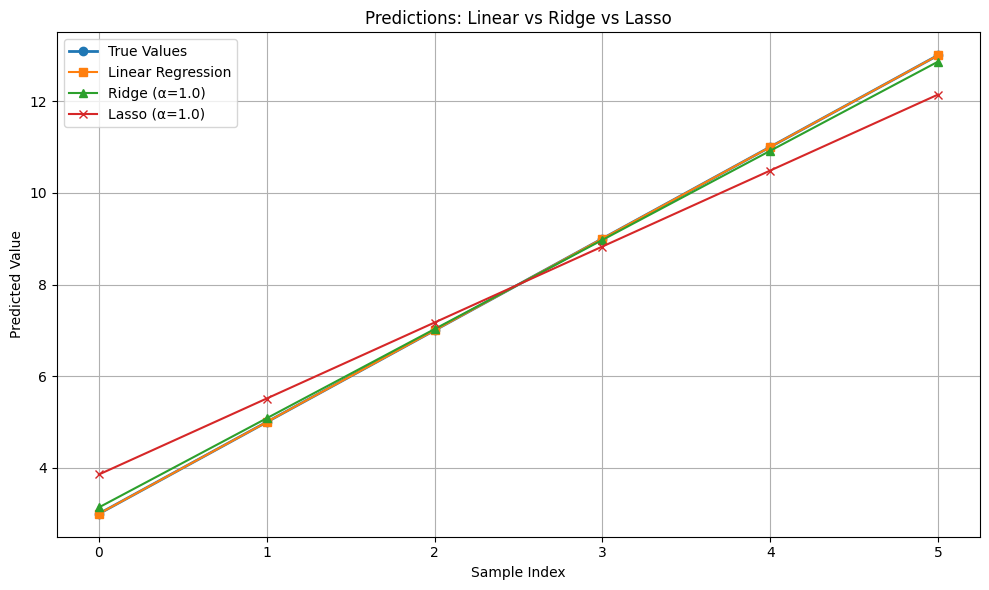


=== Prediction for New Input [7, 7] ===
Linear Regression Prediction: 15.0
Ridge Regression Prediction: 14.805555555555557
Lasso Regression Prediction: 13.8


In [ ]:
# Lets add prediction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Create Dataset ===
X = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6]
])
y = np.array([3, 5, 7, 9, 11, 13])  # Simple linear target: y = x1 + x2 + 1

# === Step 2: Train Models ===
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=1.0).fit(X, y)

# === Step 3: Make Predictions on Training Data ===
y_pred_lr = lr.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)

# === Step 4: Show Coefficients, MSE, and R² Scores ===
print("=== Linear Regression ===")
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("MSE:", mean_squared_error(y, y_pred_lr))
print("R² Score:", r2_score(y, y_pred_lr))

print("\n=== Ridge Regression ===")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("MSE:", mean_squared_error(y, y_pred_ridge))
print("R² Score:", r2_score(y, y_pred_ridge))

print("\n=== Lasso Regression ===")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y, y_pred_lasso))
print("R² Score:", r2_score(y, y_pred_lasso))

# === Step 5: Plot the Predictions ===
plt.figure(figsize=(10, 6))
plt.plot(y, label='True Values', marker='o', linewidth=2)
plt.plot(y_pred_lr, label='Linear Regression', marker='s')
plt.plot(y_pred_ridge, label='Ridge (α=1.0)', marker='^')
plt.plot(y_pred_lasso, label='Lasso (α=1.0)', marker='x')
plt.title("Predictions: Linear vs Ridge vs Lasso")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 6: Predict on New Input ===
new_sample = np.array([[7, 7]])

pred_lr = lr.predict(new_sample)
pred_ridge = ridge.predict(new_sample)
pred_lasso = lasso.predict(new_sample)

print("\n=== Prediction for New Input [7, 7] ===")
print("Linear Regression Prediction:", pred_lr[0])
print("Ridge Regression Prediction:", pred_ridge[0])
print("Lasso Regression Prediction:", pred_lasso[0])


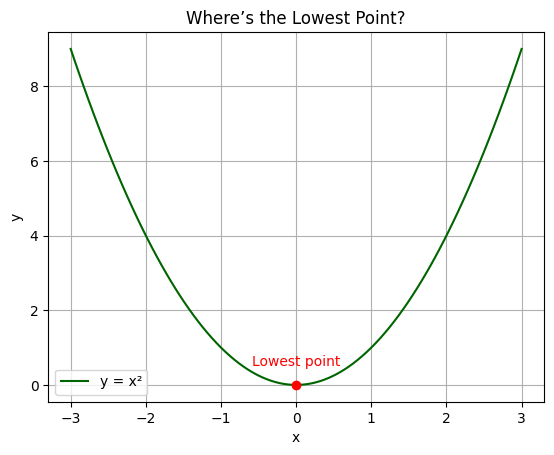

In [ ]:
# Where is the lowest Point?
import numpy as np
import matplotlib.pyplot as plt

# Bowl-shaped curve
x = np.linspace(-3, 3, 100)
y = x**2

# Plot curve
plt.plot(x, y, label="y = x²", color='darkgreen')

# Mark the lowest point
plt.plot(0, 0, 'ro')
plt.text(0, 0.5, "Lowest point", ha='center', color='red')

# Add question
plt.title("Where’s the Lowest Point?")

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


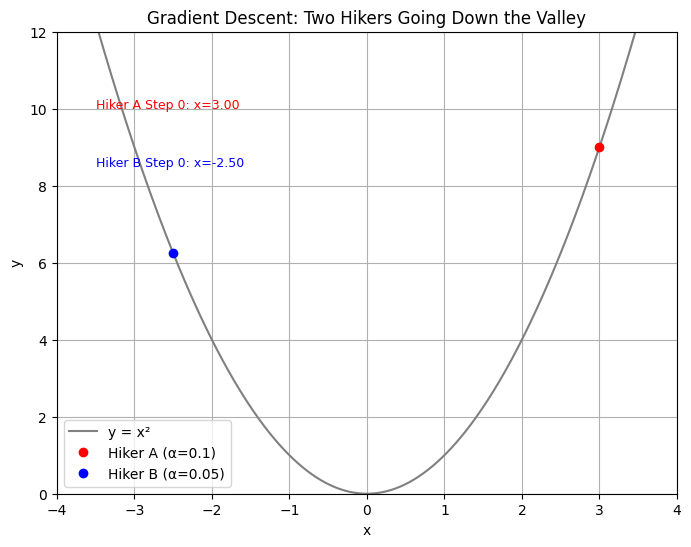

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define function and its gradient
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

# Hiker A
x0_a = 3.0
alpha_a = 0.1

# Hiker B
x0_b = -2.5
alpha_b = 0.05

steps = 30

# Gradient Descent Paths
x_vals_a = [x0_a]
x_vals_b = [x0_b]

for _ in range(steps):
    x_next_a = x_vals_a[-1] - alpha_a * grad_f(x_vals_a[-1])
    x_next_b = x_vals_b[-1] - alpha_b * grad_f(x_vals_b[-1])
    x_vals_a.append(x_next_a)
    x_vals_b.append(x_next_b)

y_vals_a = [f(x) for x in x_vals_a]
y_vals_b = [f(x) for x in x_vals_b]

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
x_curve = np.linspace(-4, 4, 400)
y_curve = f(x_curve)
ax.plot(x_curve, y_curve, 'gray', label="y = x²")

point_a, = ax.plot([], [], 'ro', label='Hiker A (α=0.1)')
point_b, = ax.plot([], [], 'bo', label='Hiker B (α=0.05)')

text_a = ax.text(-3.5, 10, '', fontsize=9, color='red')
text_b = ax.text(-3.5, 8.5, '', fontsize=9, color='blue')

ax.set_xlim(-4, 4)
ax.set_ylim(0, 12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Gradient Descent: Two Hikers Going Down the Valley")
ax.grid(True)
ax.legend()

# Animation update function
def update(i):
    point_a.set_data([x_vals_a[i]], [y_vals_a[i]])
    point_b.set_data([x_vals_b[i]], [y_vals_b[i]])
    text_a.set_text(f"Hiker A Step {i}: x={x_vals_a[i]:.2f}")
    text_b.set_text(f"Hiker B Step {i}: x={x_vals_b[i]:.2f}")
    return point_a, point_b, text_a, text_b

ani = animation.FuncAnimation(fig, update, frames=steps+1, interval=400, blit=False)

# Show animation inline in Colab
HTML(ani.to_jshtml())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

# Starting point
x_start = 2.5

# Learning rates to compare
learning_rates = [0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red']
labels = ['Small Step Hiker (0.01)', 'Medium Step Hiker (0.1)', 'Large Step Hiker (0.5)']

# Plot the function
x = np.linspace(-3, 3, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k-', label='y = x²')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

# Show each learning rate path with arrows
for lr, color, label in zip(learning_rates, colors, labels):
    x_vals = [x_start]
    for _ in range(5):
        x_new = x_vals[-1] - lr * grad_f(x_vals[-1])
        x_vals.append(x_new)

    y_vals = [f(xi) for xi in x_vals]
    plt.plot(x_vals, y_vals, 'o-', color=color, label=label)

    # Draw arrows showing steps
    for i in range(len(x_vals) - 1):
        dx = x_vals[i+1] - x_vals[i]
        dy = y_vals[i+1] - y_vals[i]
        plt.arrow(x_vals[i], y_vals[i], dx, dy, color=color, head_width=0.1, length_includes_head=True)

# Final formatting
plt.xlabel("x")
plt.ylabel("y = x²")
plt.title("Step Size and Direction")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A quadratic cost function: y = (x - 3)^2
import matplotlib.pyplot as plt

def func(x):
    return (x - 3)**2

def grad(x):
    return 2*(x - 3)

x = 0  # starting point
lr = 0.15
steps = []
for i in range(20):
    x = x - lr * grad(x)
    steps.append(x)

xs = [i/10 for i in range(-10, 60)]
ys = [func(i) for i in xs]

plt.plot(xs, ys, label='Function')
plt.plot(steps, [func(i) for i in steps], 'ro--', label='Steps')
plt.legend()
plt.title("Gradient Descent on a Simple Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Function and its gradient
def func(x):
    return (x - 3)**2

def grad(x):
    return 2*(x - 3)

# Main plot function
def plot_gradient_descent(lr=0.1):
    x = 0
    steps = [x]
    for _ in range(20):
        x = x - lr * grad(x)
        steps.append(x)

    xs = np.linspace(-1, 6, 100)
    ys = func(xs)

    plt.figure(figsize=(8, 5))
    plt.plot(xs, ys, label="Function: (x - 3)^2")
    plt.plot(steps, [func(s) for s in steps], 'ro--', label="Gradient Descent Steps")
    plt.title(f"Gradient Descent | Learning Rate: {lr}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create slider
interact(plot_gradient_descent, lr=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01))

interactive(children=(FloatSlider(value=0.1, description='lr', max=1.0, min=0.01, step=0.01), Output()), _dom_…

<function __main__.plot_gradient_descent(lr=0.1)>

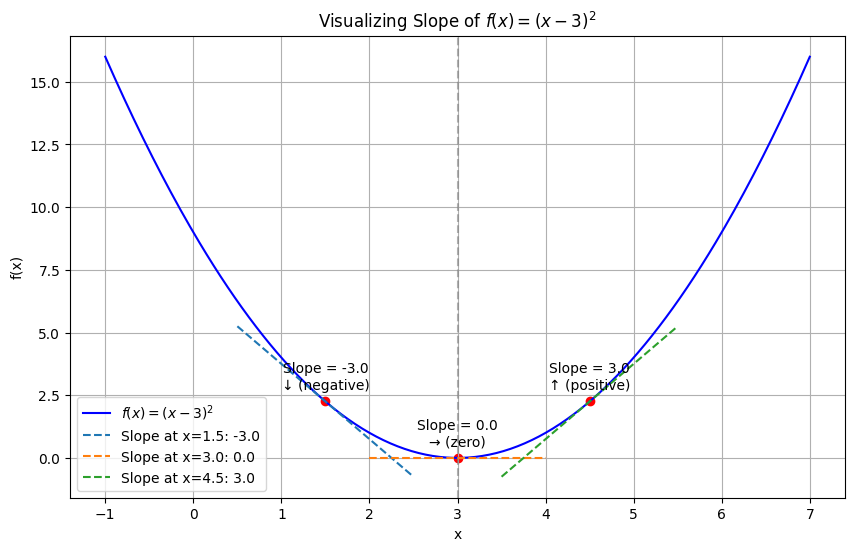

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function and derivative
def f(x):
    return (x - 3)**2

def f_prime(x):
    return 2 * (x - 3)

# x range for plotting the function
x_vals = np.linspace(-1, 7, 300)
y_vals = f(x_vals)

# Points of interest
points = [1.5, 3, 4.5]  # x < 3, x = 3, x > 3

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = (x - 3)^2$', color='blue')
plt.axvline(3, linestyle='--', color='gray', alpha=0.6)

# Plot tangent lines at selected points
for x0 in points:
    slope = f_prime(x0)
    y0 = f(x0)
    tangent_x = np.linspace(x0 - 1, x0 + 1, 10)
    tangent_y = slope * (tangent_x - x0) + y0
    plt.plot(tangent_x, tangent_y, linestyle='--', label=f'Slope at x={x0:.1f}: {slope:.1f}')
    plt.scatter(x0, y0, color='red')

    # Annotate slope direction
    direction = '↓ (negative)' if slope < 0 else ('↑ (positive)' if slope > 0 else '→ (zero)')
    plt.annotate(f"Slope = {slope:.1f}\n{direction}", (x0, y0 + 0.5), fontsize=10, ha='center')

# Plot settings
plt.title("Visualizing Slope of $f(x) = (x - 3)^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

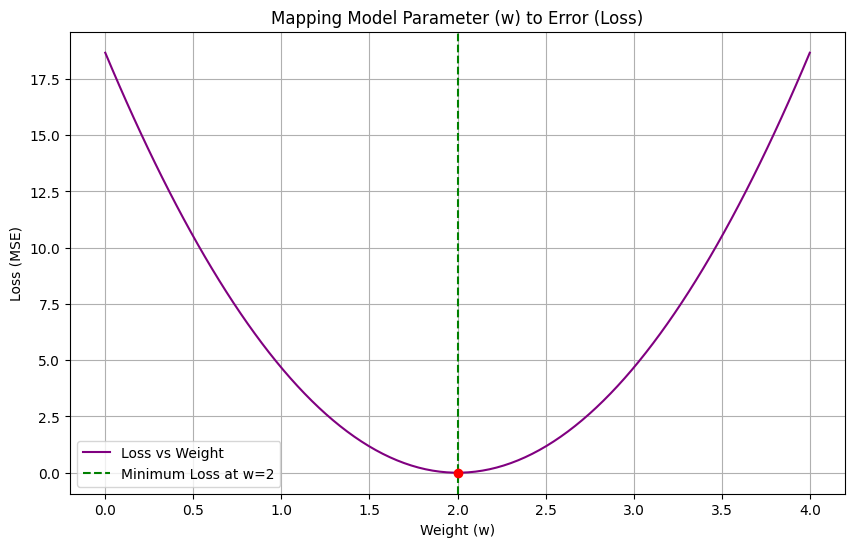

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple data
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

# Mean Squared Error Loss
def compute_loss(w):
    y_pred = w * x
    return np.mean((y - y_pred) ** 2)

# Try various w values
w_values = np.linspace(0, 4, 100)
loss_values = [compute_loss(w) for w in w_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(w_values, loss_values, label="Loss vs Weight", color='purple')
plt.axvline(x=2, linestyle='--', color='green', label='Minimum Loss at w=2')
plt.scatter([2], [compute_loss(2)], color='red', zorder=5)
plt.title("Mapping Model Parameter (w) to Error (Loss)")
plt.xlabel("Weight (w)")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
import numpy as np

x = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

model = SGDRegressor(max_iter = 1000, learning_rate = 'constant', eta0=0.01)
model.fit(x,y)

print("Coefficient:", model.coef_[0])

Coefficient: 1.8164976231425718


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error

# Simple dataset
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.2, 2.4, 3.1, 4.3, 5.1])

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x, y)
print("Lasso Coefficient:", lasso.coef_[0])

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x, y)
print("Ridge Coefficient:", ridge.coef_[0])

# SGDRegressor
sgd = SGDRegressor(penalty='l2', alpha=0.1, max_iter=1000, learning_rate='constant', eta0=0.01)
sgd.fit(x, y)
print("SGD Coefficient:", sgd.coef_[0])

Lasso Coefficient: 0.9199999999999999
Ridge Coefficient: 0.9603960396039604
SGD Coefficient: 0.9657744644954833


In [ ]:
# prompt: Write me a code for page rank. use a simple data set of 3 to 4 pages. show me the page ranks of each iteration. don't approximate the rank values.

import numpy as np

def page_rank(adj_matrix, damping_factor=0.85, iterations=100):
  """
  Calculates PageRank for a given adjacency matrix.

  Args:
    adj_matrix: A NumPy array representing the adjacency matrix of the web graph.
    damping_factor: The damping factor (probability of following a link).
    iterations: The number of iterations to perform.

  Returns:
    A NumPy array containing the PageRank values for each page.
  """
  num_pages = len(adj_matrix)
  page_ranks = np.ones(num_pages) / num_pages  # Initialize PageRank values

  for iteration in range(iterations):
    print(f"Iteration {iteration + 1}:")
    new_page_ranks = np.zeros(num_pages)
    for i in range(num_pages):
        for j in range(num_pages):
            if adj_matrix[j][i] == 1:
                out_degree = np.sum(adj_matrix[j])
                if out_degree > 0 :
                    new_page_ranks[i] += damping_factor * (page_ranks[j] / out_degree)
                else:
                    new_page_ranks[i] += damping_factor * (page_ranks[j] / num_pages)

        new_page_ranks[i] += (1 - damping_factor) / num_pages

    page_ranks = new_page_ranks
    print(page_ranks)

  return page_ranks

# Example usage:
# Adjacency matrix for a simple web graph with 4 pages
# Page 1 links to pages 2 and 3
# Page 2 links to page 1
# Page 3 links to page 4
# Page 4 links to page 3

adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

final_ranks = page_rank(adjacency_matrix)

print("\nFinal PageRanks:", final_ranks)


Iteration 1:
[0.25    0.14375 0.35625 0.25   ]
Iteration 2:
[0.1596875 0.14375   0.35625   0.3403125]
Iteration 3:
[0.1596875  0.10536719 0.39463281 0.3403125 ]
Iteration 4:
[0.12706211 0.10536719 0.39463281 0.37293789]
Iteration 5:
[0.12706211 0.0915014  0.4084986  0.37293789]
Iteration 6:
[0.11527619 0.0915014  0.4084986  0.38472381]
Iteration 7:
[0.11527619 0.08649238 0.41350762 0.38472381]
Iteration 8:
[0.11101852 0.08649238 0.41350762 0.38898148]
Iteration 9:
[0.11101852 0.08468287 0.41531713 0.38898148]
Iteration 10:
[0.10948044 0.08468287 0.41531713 0.39051956]
Iteration 11:
[0.10948044 0.08402919 0.41597081 0.39051956]
Iteration 12:
[0.10892481 0.08402919 0.41597081 0.39107519]
Iteration 13:
[0.10892481 0.08379304 0.41620696 0.39107519]
Iteration 14:
[0.10872409 0.08379304 0.41620696 0.39127591]
Iteration 15:
[0.10872409 0.08370774 0.41629226 0.39127591]
Iteration 16:
[0.10865158 0.08370774 0.41629226 0.39134842]
Iteration 17:
[0.10865158 0.08367692 0.41632308 0.39134842]
Itera

In [ ]:
# The first Implementation of PageRank
# !pip install python-igraph
from igraph import Graph

g = Graph(directed=True)
g.add_vertices(3)
g.add_edges([(0,1), (0,2), (1,2), (2,0)])
pr = g.pagerank()
print(pr)

[0.3877897117015263, 0.2148106274731487, 0.3973996608253251]


Influence Scores (PageRank):
Deepanshu: 0.1878
Zoya: 0.1151
Tinku: 0.2130
Aryan: 0.2962
Laxman: 0.1878


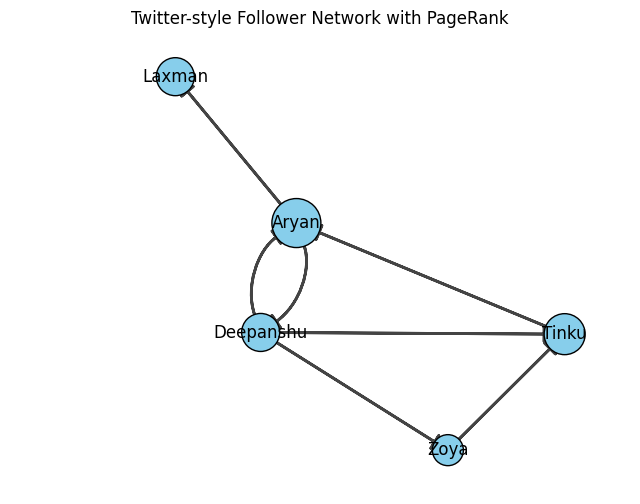

In [ ]:
# Twitter Followers
# Install igraph if not already installed
#!pip install python-igraph

from igraph import Graph
from igraph import plot
import matplotlib.pyplot as plt

# Step 1: Create a directed graph (Twitter-style follow graph)
# Each directed edge (A, B) means "A follows B"
users = ["Deepanshu", "Zoya", "Tinku", "Aryan", "Laxman"]
edges = [
    ("Deepanshu", "Zoya"),
    ("Deepanshu", "Tinku"),
    ("Deepanshu", "Aryan"), ("Aryan", "Deepanshu"),
    ("Zoya", "Tinku"),
    ("Tinku", "Aryan"),
    ("Aryan", "Laxman")]

# Step 2: Build the igraph Graph
g = Graph(directed=True)
g.add_vertices(users)
g.add_edges(edges)

# Step 3: Compute PageRank (higher = more influential)
page_ranks = g.pagerank(damping = 0.85)

# Step 4: Display results
print("Influence Scores (PageRank):")
for user, score in zip(users, page_ranks):
    print(f"{user}: {score:.4f}")

# Step 5: Visualize the graph
layout = g.layout("fr")  # Force-directed layout
fig, ax = plt.subplots(figsize=(8,6))
g.vs["label"] = users
g.vs["size"] = [20 + 100 * pr for pr in page_ranks]  # Size nodes by rank
g.vs["color"] = "skyblue"
g.es["arrow_size"] = 0.5
plot(g, layout=layout, vertex_label=g.vs["label"], target=ax)
plt.title("Twitter-style Follower Network with PageRank")
plt.show()


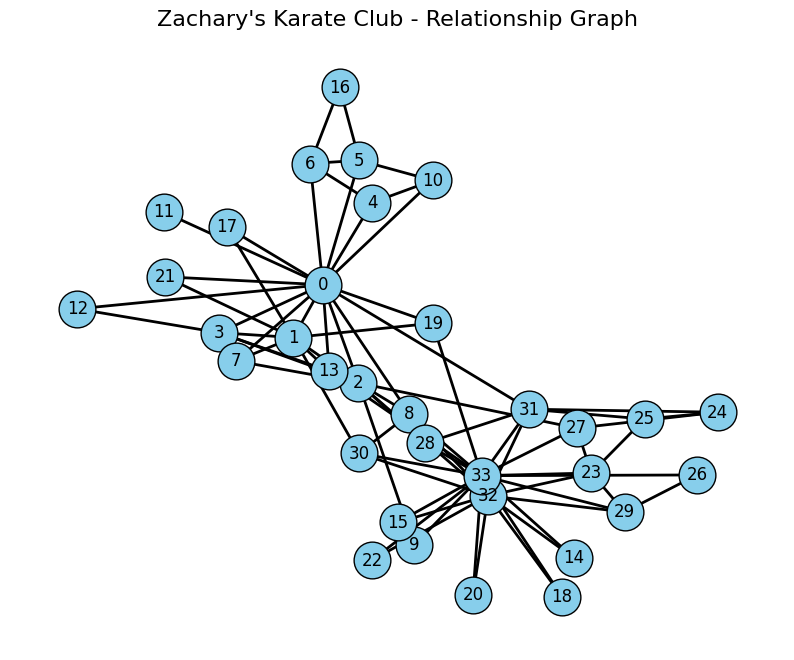

In [ ]:
# Zachary's Karate Club - Relationship Graph
import networkx as nx
import matplotlib.pyplot as plt

# Load the built-in Karate Club graph from NetworkX
G = nx.karate_club_graph()

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')

# Draw edges (relationships)
nx.draw_networkx_edges(G, pos, width=2)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Title and display
plt.title("Zachary's Karate Club - Relationship Graph", fontsize=16)
plt.axis('off')
plt.show()

Converged at iteration 32 with total change 0.000001

Iteration-wise PageRank Scores:
Iter  1 | Δ = 0.771565 | Top 3 nodes: [33  0 32]
Iter  2 | Δ = 0.376685 | Top 3 nodes: [ 0 33 32]
Iter  3 | Δ = 0.207403 | Top 3 nodes: [33  0 32]
Iter  4 | Δ = 0.111883 | Top 3 nodes: [33  0 32]
Iter  5 | Δ = 0.064310 | Top 3 nodes: [33  0 32]
Iter  6 | Δ = 0.035253 | Top 3 nodes: [33  0 32]
Iter  7 | Δ = 0.020587 | Top 3 nodes: [33  0 32]
Iter  8 | Δ = 0.011570 | Top 3 nodes: [33  0 32]
Iter  9 | Δ = 0.006811 | Top 3 nodes: [33  0 32]
Iter 10 | Δ = 0.003940 | Top 3 nodes: [33  0 32]
Iter 11 | Δ = 0.002324 | Top 3 nodes: [33  0 32]
Iter 12 | Δ = 0.001379 | Top 3 nodes: [33  0 32]
Iter 13 | Δ = 0.000810 | Top 3 nodes: [33  0 32]
Iter 14 | Δ = 0.000496 | Top 3 nodes: [33  0 32]
Iter 15 | Δ = 0.000290 | Top 3 nodes: [33  0 32]
Iter 16 | Δ = 0.000184 | Top 3 nodes: [33  0 32]
Iter 17 | Δ = 0.000110 | Top 3 nodes: [33  0 32]
Iter 18 | Δ = 0.000071 | Top 3 nodes: [33  0 32]
Iter 19 | Δ = 0.000046 | Top 3 n

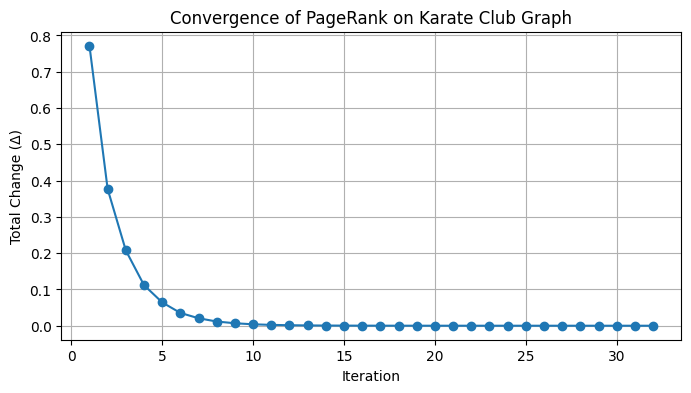

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the graph
G = nx.karate_club_graph()

# Parameters
damping_factor = 0.85
max_iter = 100
tol = 1e-6

# Initialize
N = G.number_of_nodes()
pr = np.ones(N) / N  # Initial PageRank values
adj = nx.to_numpy_array(G)  # Adjacency matrix

# Normalize the adjacency matrix
out_degree = adj.sum(axis=1)
transition_matrix = adj / out_degree[:, None]

# PageRank iteration
history = []
for i in range(max_iter):
    new_pr = (1 - damping_factor) / N + damping_factor * transition_matrix.T @ pr
    delta = np.abs(new_pr - pr).sum()
    history.append((i + 1, new_pr.copy(), delta))
    pr = new_pr
    if delta < tol:
        print(f"Converged at iteration {i+1} with total change {delta:.6f}")
        break

# Display results
print("\nIteration-wise PageRank Scores:")
for i, scores, delta in history:
    print(f"Iter {i:2d} | Δ = {delta:.6f} | Top 3 nodes: {np.argsort(scores)[-3:][::-1]}")

# Plot convergence
deltas = [h[2] for h in history]
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(deltas)+1), deltas, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Change (Δ)')
plt.title('Convergence of PageRank on Karate Club Graph')
plt.grid(True)
plt.show()

All nodes by PageRank:
Node 33: 0.09698041880501741
Node 0: 0.08850807396280012
Node 32: 0.07592643687005646
Node 2: 0.06276686454603017
Node 1: 0.057414840497110056
Node 31: 0.04198548926127872
Node 23: 0.04114596964602211
Node 3: 0.03721208153631377
Node 5: 0.03381044255357727
Node 13: 0.033474187085322404
Node 8: 0.03338155566846444
Node 6: 0.03152901134345504
Node 25: 0.028672962013730707
Node 29: 0.028271813832825125
Node 27: 0.027235358397633882
Node 7: 0.026464618678806107
Node 30: 0.02303184425091186
Node 10: 0.020689016083505596
Node 4: 0.020503977347501652
Node 16: 0.016755401561857987
Node 24: 0.01663437445025268
Node 15: 0.01637633262359366
Node 26: 0.015240392773380823
Node 28: 0.01447852177427162
Node 19: 0.013077518431081969
Node 22: 0.01296059860686279
Node 14: 0.012941600888556285
Node 12: 0.011474872305945287
Node 21: 0.01136015256356328
Node 20: 0.011224235021037596
Node 11: 0.009785686547904305
Node 17: 0.009677265915396801
Node 18: 0.009544864590131914
Node 9: 0.00

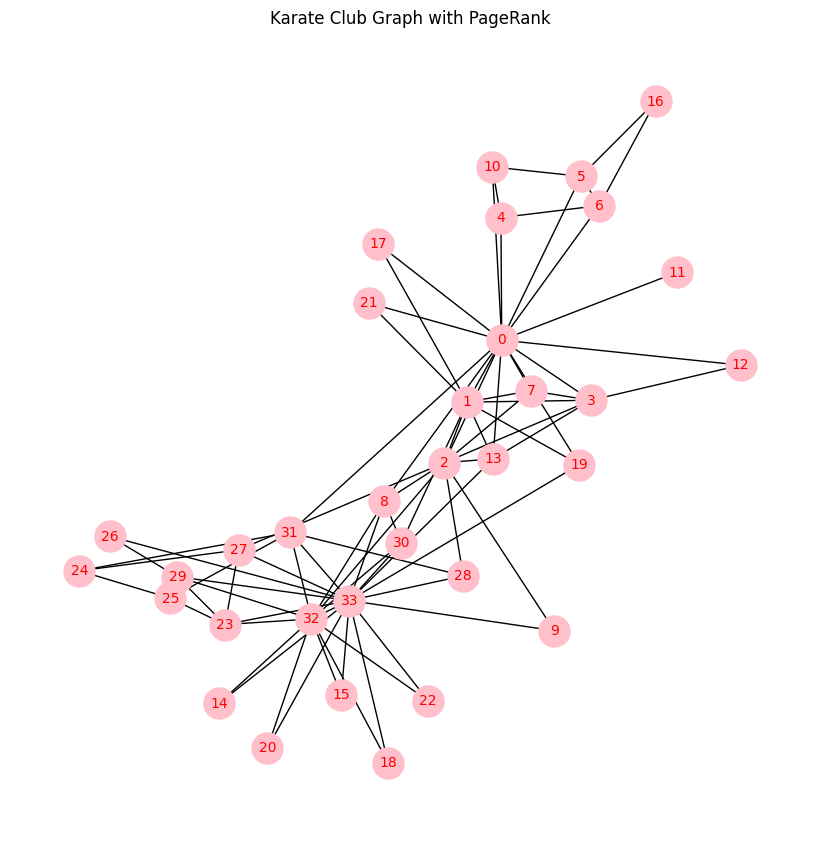

In [ ]:
import networkx as nx

# Load the Karate Club dataset (built into NetworkX)
G = nx.karate_club_graph()

# Compute the PageRank
pagerank = nx.pagerank(G, alpha=0.85)  # alpha is the damping factor (default is 0.85)

# Display the nodes with the highest PageRank scores
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_n = sorted_pagerank[:34]
print("All nodes by PageRank:")
for node, score in top_n:
    print(f"Node {node}: {score}")

# Optional: Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=500, font_size=10, font_color='red', node_color='pink')
plt.title("Karate Club Graph with PageRank")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a directed graph
G =

# Step 2: Add endorsements (A -> B means A endorsed B)
endorsements = [

]

G.add_edges_from()

# Step 3: Compute PageRank


# Step 4: Display results (without f-strings)
print("LinkedIn-style Endorsement PageRank Scores:")
for user, score in pageranks.items():
    print(user + ": " + str(round(score, 4)))

# Step 5: Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
node_sizes = [5000 * pageranks[node] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightgreen")
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos)

plt.title("LinkedIn Endorsement Network (Node size = Influence)")
plt.show()

PageRank Scores:
A: 0.1162
B: 0.2149
C: 0.2988
D: 0.3701


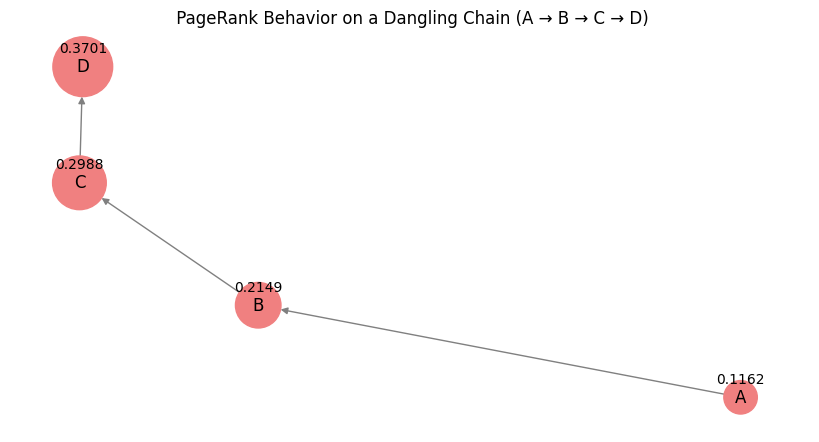

In [ ]:
# The curious Case - What do you take away?
import networkx as nx
import matplotlib.pyplot as plt

# Create the "failing" graph: A → B → C → D
G = nx.DiGraph()
edges = [('A', 'B'), ('B', 'C'), ('C', 'D')]
G.add_edges_from(edges)

# Run PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Show PageRank values
print("PageRank Scores:")
for node, score in pagerank.items():
    print(f"{node}: {score:.4f}")

# Visualize
plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with PageRank-based size
node_sizes = [pagerank[n] * 5000 for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightcoral', arrows=True, edge_color='gray')

# Annotate PageRank values
for node, (x, y) in pos.items():
    plt.text(x, y + 0.08, f"{pagerank[node]:.4f}", ha='center', fontsize=10, color='black')

plt.title(" PageRank Behavior on a Dangling Chain (A → B → C → D)")
plt.axis('off')
plt.show()


In [ ]:
# The story of Apples and Oranges
# Where are we heading at?

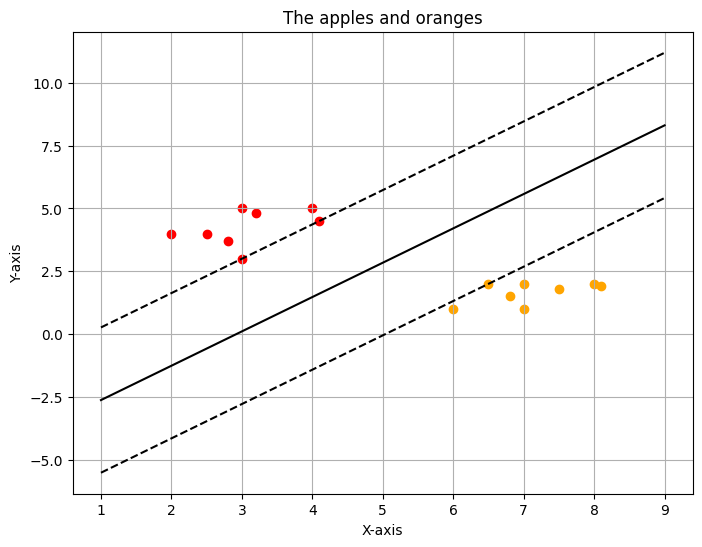

In [ ]:
# What does that look like in code?
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Red and orange points
red_points = np.array([
    [2, 4], [3, 3], [4, 5], [3, 5], [2.5, 4], [3.2, 4.8], [4.1, 4.5], [2.8, 3.7]
])
orange_points = np.array([
    [6, 1], [7, 2], [8, 2], [7, 1], [6.5, 2], [7.5, 1.8], [8.1, 1.9], [6.8, 1.5]
])

# Combine data
X = np.vstack((red_points, orange_points))
y = np.array([0]*len(red_points) + [1]*len(orange_points))

# Train linear SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Extract model parameters
w = model.coef_[0]
b = model.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create a grid to draw hyperplane and margins
xx = np.linspace(1, 9, 100)
yy = slope * xx + intercept

# Margin calculation
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + slope**2) * margin
yy_up = yy + np.sqrt(1 + slope**2) * margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_points[:, 0], red_points[:, 1], color='red')
plt.scatter(orange_points[:, 0], orange_points[:, 1], color='orange')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.title('The apples and oranges')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


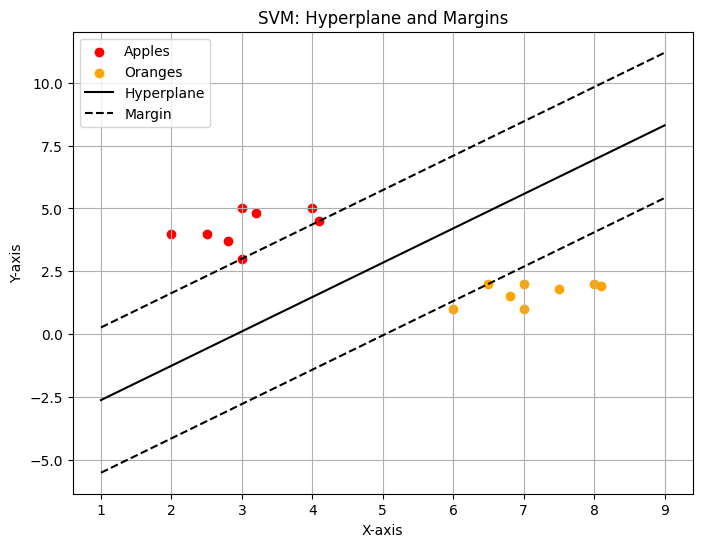

In [ ]:
# Code with Labels
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# More red and orange points
red_points = np.array([
    [2, 4], [3, 3], [4, 5], [3, 5], [2.5, 4], [3.2, 4.8], [4.1, 4.5], [2.8, 3.7]
])
orange_points = np.array([
    [6, 1], [7, 2], [8, 2], [7, 1], [6.5, 2], [7.5, 1.8], [8.1, 1.9], [6.8, 1.5]
])

# Combine data
X = np.vstack((red_points, orange_points))
y = np.array([0]*len(red_points) + [1]*len(orange_points))

# Train linear SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Extract model parameters
w = model.coef_[0]
b = model.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create a grid to draw hyperplane and margins
xx = np.linspace(1, 9, 100)
yy = slope * xx + intercept

# Margin calculation
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + slope**2) * margin
yy_up = yy + np.sqrt(1 + slope**2) * margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Apples')
plt.scatter(orange_points[:, 0], orange_points[:, 1], color='orange', label='Oranges')
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')
plt.legend()
plt.title('SVM: Hyperplane and Margins')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


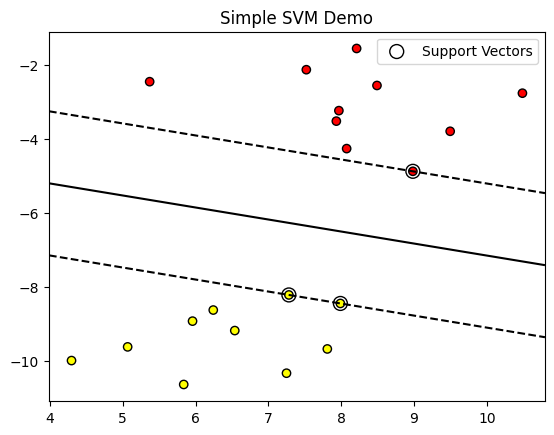

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load a small dataset with only two features
X, y = datasets.make_blobs(n_samples=20, centers=2, random_state=6)

# Train a linear SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')

# Plot the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("Simple SVM Demo")
plt.legend()
plt.show()


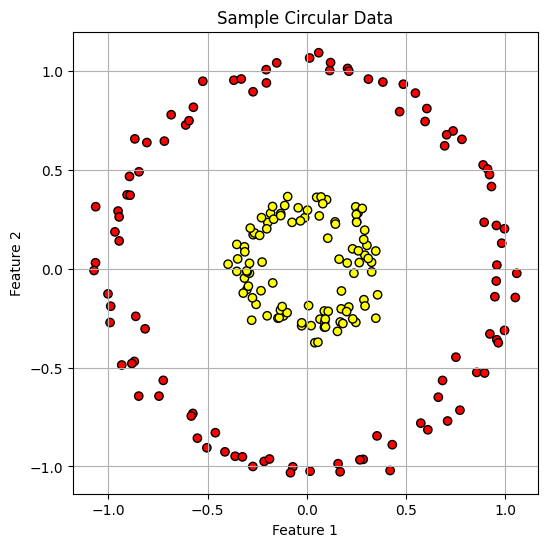

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Generate non-linear sample data (circles)
X, y = datasets.make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# Plot the raw data only
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
plt.title("Sample Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


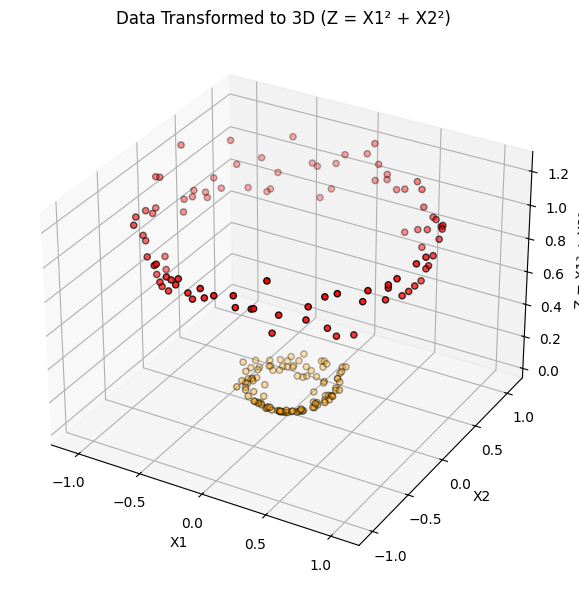

In [ ]:
# What if we visualize it in multiple dimensions?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# Generate the same circular data
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# Apply a manual transformation to lift the data into 3D
# Let's use: z = x^2 + y^2 (a common feature map for circles)
x1 = X[:, 0]
x2 = X[:, 1]
z = x1**2 + x2**2

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map: red (0) and orange (1)
colors = np.where(y == 0, 'red', 'orange')

ax.scatter(x1, x2, z, c=colors, edgecolor='k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z = X1² + X2²')
ax.set_title('Data Transformed to 3D (Z = X1² + X2²)')
plt.tight_layout()
plt.show()


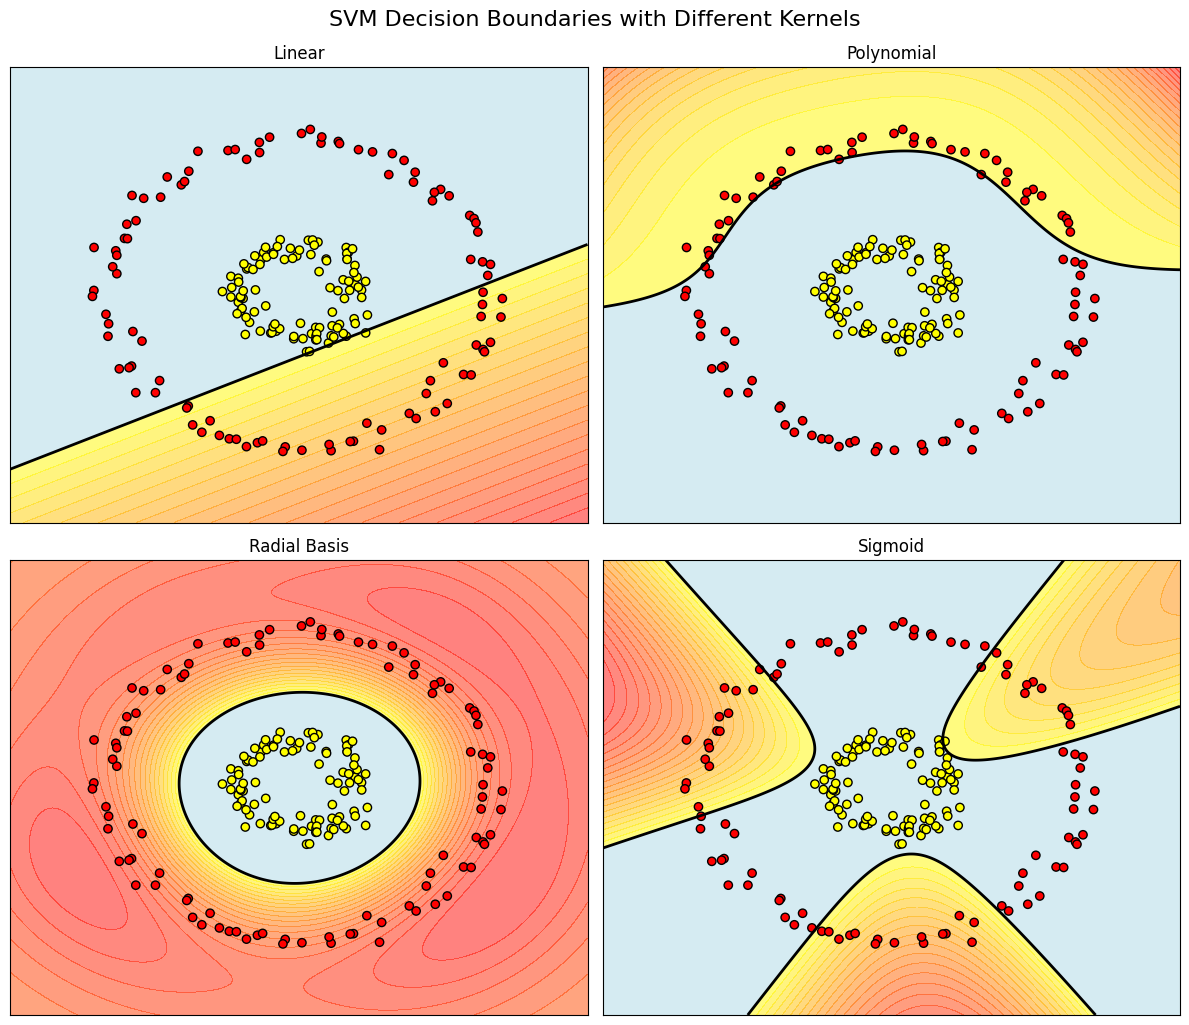

In [ ]:
# Understanding the 4 kernels
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Generate non-linear sample data
X, y = datasets.make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)

# Set up the SVM classifiers with different kernels
kernels = {
    'Linear': svm.SVC(kernel='linear'),
    'Polynomial': svm.SVC(kernel='poly', degree = 5),
    'Radial Basis': svm.SVC(kernel='rbf'),
    'Sigmoid': svm.SVC(kernel='sigmoid')
}

# Train all models
models = {}
for name, clf in kernels.items():
    clf.fit(X, y)
    models[name] = clf

# Plotting
plt.figure(figsize=(12, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                         np.linspace(-1.5, 1.5, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 20), cmap='autumn', alpha=0.5)
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='lightblue', alpha=0.5)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # decision boundary

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.title(name)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.suptitle("SVM Decision Boundaries with Different Kernels", fontsize=16, y=1.02)
plt.show()


In [ ]:
# Working with IRIS data set
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for easy 2D visualization
y = iris.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, model, "SVM with RBF Kernel (Iris Dataset)")


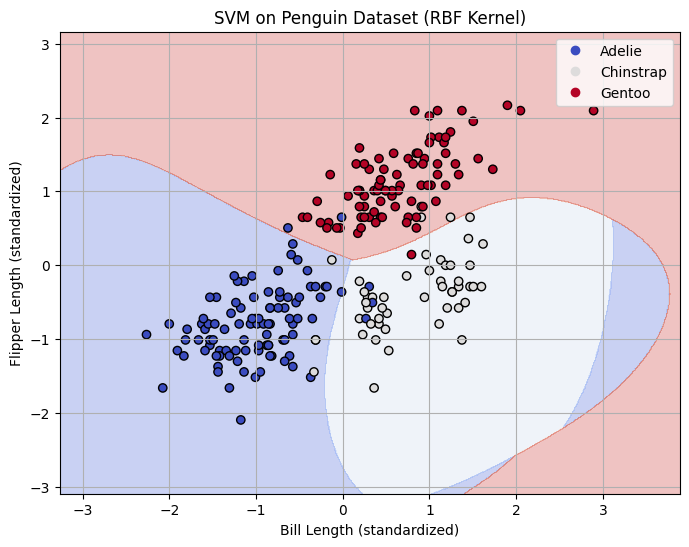

In [ ]:
# SVM with penguin data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.cbook import get_sample_data
import seaborn as sns

# Load penguin dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

# Select features and labels
X = penguins[['bill_length_mm', 'flipper_length_mm']].values
y = penguins['species'].values

# Encode species labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    handles, _ = scatter.legend_elements()
    plt.legend(handles=list(handles), labels=list(le.classes_))
    plt.title(title)
    plt.xlabel("Bill Length (standardized)")
    plt.ylabel("Flipper Length (standardized)")
    plt.grid(True)
    plt.show()

# Plotting
plot_decision_boundary(X_train, y_train, model, "SVM on Penguin Dataset (RBF Kernel)")


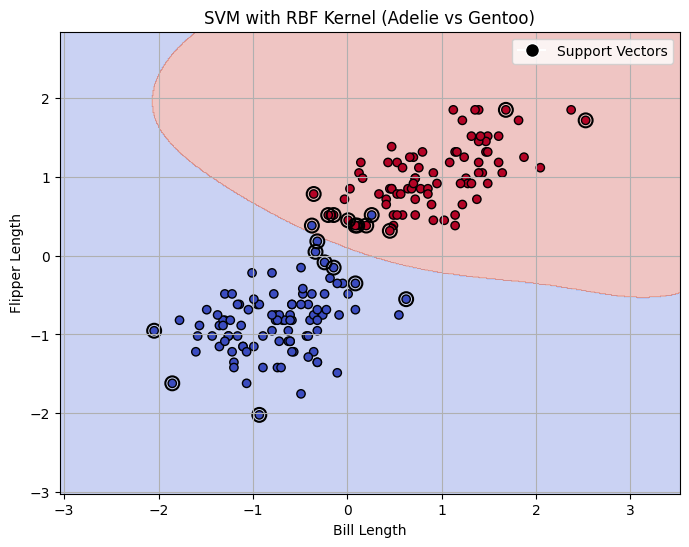

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset and filter for only 2 species
penguins = sns.load_dataset("penguins").dropna()
penguins = penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']].values
y = penguins['species'].values

# Encode target labels (Adelie=0, Gentoo=1)
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Plotting decision boundary with support vectors
def plot_decision_boundary(X, y, model, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Highlight the support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                facecolors='none', edgecolors='k', s=100, linewidths=1.5, label="Support Vectors")

    # Separate legends: one for the data points and one for the support vectors
    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles, labels=list(le.classes_))
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label="Support Vectors")],
               loc='upper right')

    plt.title(title)
    plt.xlabel("Bill Length")
    plt.ylabel("Flipper Length")
    plt.grid(True)
    plt.show()

# Plot decision boundary with support vectors
plot_decision_boundary(X_train, y_train, model, "SVM with RBF Kernel (Adelie vs Gentoo)")


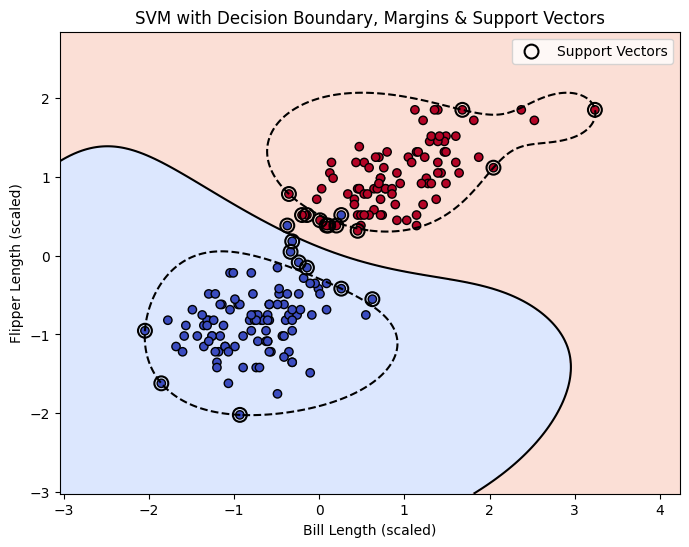

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and clean penguins dataset
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins = penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

# Features and labels
X = penguins[['bill_length_mm', 'flipper_length_mm']].values
y = penguins['species'].values
le = LabelEncoder()
y = le.fit_transform(y)  # 0 = Adelie, 1 = Gentoo

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Plotting function with margins
def plot_svm_with_margins(X, y, model, title):
    plt.figure(figsize=(8, 6))

    # Create mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Compute decision function over mesh
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    contour = plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'],
                          colors='k', linewidths=1.5)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Plot support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none',
                edgecolors='black', linewidth=1.5, label='Support Vectors')

    plt.xlabel('Bill Length (scaled)')
    plt.ylabel('Flipper Length (scaled)')
    plt.title(title)
    plt.legend()
    plt.show()

plot_svm_with_margins(X_train, y_train, model, "SVM with Decision Boundary, Margins & Support Vectors")
